<a href="https://colab.research.google.com/github/Pravanith/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Uncovering Health Disparities: A Statistical Analysis of Diabetes and Obesity**

# **Introduction**

In today's health-focused time, where we care a lot about public well-being, we need to look closely at the factors that affect health outcomes. In this project, I want to thoroughly study important health measures, specifically focusing on diabetes, obesity, and life expectancy in different counties across California.

In the United States, we're paying a lot of attention to health issues like diabetes, obesity, and life expectancy. These are big challenges for people and communities across the country. California, being the most populated state, is like a mini-version of the whole country, with diverse people and places. By looking at diabetes, obesity, and life expectancy in California, we can learn about health differences and trends.

I've collected a bunch of information from different places to create a detailed picture of the health landscape. The dataset covers several years and includes key information like how many people have diagnosed diabetes, the percentage of obesity, and how long people are expected to live in each county.

Goals:


*   To Assess the top 10 states with the highest diabetes
population for people aged 20 and over.
*   Display how the diabetes population for people aged 20 and over has changed over the years.
*   Explore the relationship between diagnosed diabetes percentage and obesity percentage.
*   Compare the distribution of diagnosed diabetes percentages between metropolitan and non-metropolitan areas.
*  To understand how different health indicators are correlated.

# **Data Sources**

Diabetes Prevalance :https://data.world/dc-data-journalismurban-rural-health-and-demographic-data/workspace/file?filename=DiabetesPrev.csv

Lifeexpectancy:https://data.world/dc-data-journalism/urban-rural-health-and-demographic-data/workspace/file?filename=Life+Expectancy.csv

Diabetes and obesity data(2010):https://gis.cdc.gov/grasp/diabetes/diabetesatlas-analysis.html



# **Imports**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Exploring Diabetes Prevalence in Population Data**

The dataset comprises information on diabetes populations in various United States counties over multiple years. Each entry includes details such as the year of recording, unique county codes, county names, state names and abbreviations, metro/nonmetro classification, and the diabetes population aged 20 and over, along with an inferred total population for the same age group.

In [ ]:
diabetes_Population = pd.read_csv('https://query.data.world/s/hgofwzmtmxndlbcln3p7n36x4fdc7f?dws=00000')
diabetes_Population

,year,fips,state_fips,county_fips,county_name,state_name,state_abbr,metro_nonmetro,diabetes_population_20_over,total_population_inferred_20_over
0,2007,1001,1,1,Autauga County,Alabama,AL,Metropolitan,4044.0,35474.0
1,2011,1001,1,1,Autauga County,Alabama,AL,Metropolitan,4748.0,39240.0
2,2009,1001,1,1,Autauga County,Alabama,AL,Metropolitan,4338.0,35268.0
3,2006,1001,1,1,Autauga County,Alabama,AL,Metropolitan,4038.0,35421.0
4,2012,1001,1,1,Autauga County,Alabama,AL,Metropolitan,4724.0,39367.0
...,...,...,...,...,...,...,...,...,...,...
25132,2006,56045,56,45,Weston County,Wyoming,WY,Nonmetropolitan,353.0,5269.0
25133,2009,56045,56,45,Weston County,Wyoming,WY,Nonmetropolitan,391.0,5284.0
25134,2011,56045,56,45,Weston County,Wyoming,WY,Nonmetropolitan,461.0,5424.0
25135,2012,56045,56,45,Weston County,Wyoming,WY,Nonmetropolitan,526.0,5367.0


# **Graph - Most Affected states for Diabetes Population**

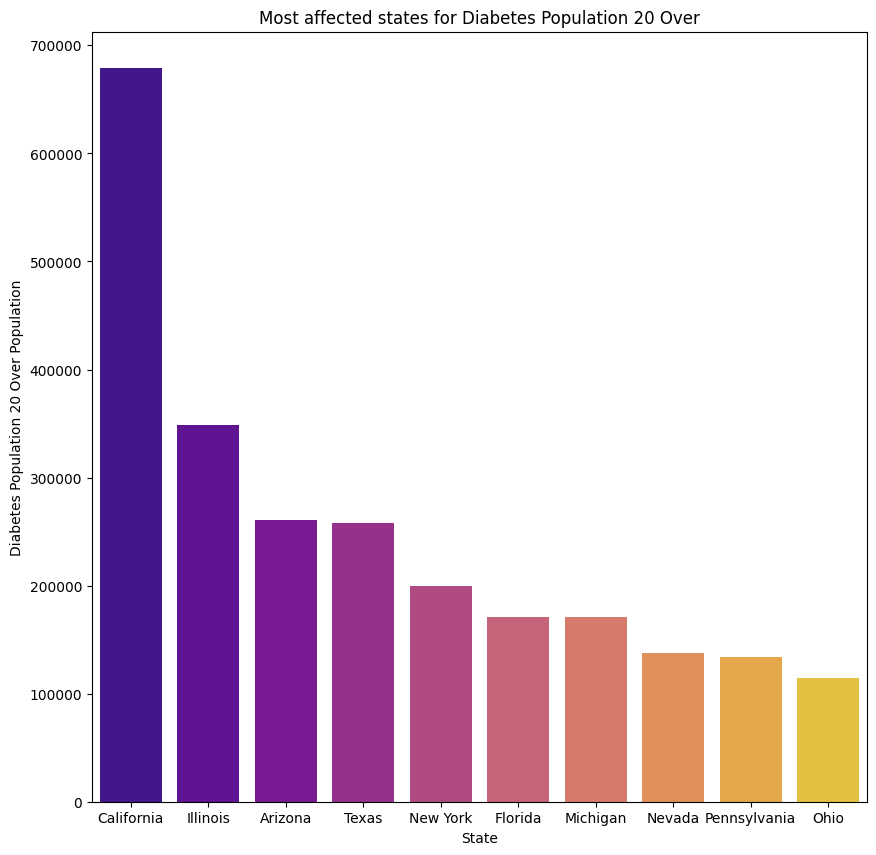

In [ ]:
#Bar Graph

def plot_top_states(data, column_name, top_n=5, palette='magma'):
    max_values = data.groupby('state_name')[column_name].max().nlargest(top_n)
    plt.figure(figsize=(10, 10))
    sns.barplot(x=max_values.index, y=max_values.values, palette=palette)
    plt.title(f'Most affected states for {column_name.replace("_", " ").title()}')
    plt.xlabel('State')
    plt.ylabel(f'{column_name.replace("_", " ").title()} Population')
    plt.show()
plot_top_states(diabetes_Population, 'diabetes_population_20_over', top_n=10, palette='plasma')

The bar graph illustrates the states most affected by diabetes based on the 'diabetes_population_20_over' column. Each bar on the graph corresponds to a state, and the height of the bar represents the diabetes population for people aged 20 and over in that state. The graph is sorted in descending order, so the leftmost bars correspond to the states with the highest diabetes populations. The color variation in the bars is applied for visual appeal, with each color representing a different state.
This visual representation allows for a quick comparison of the diabetes impact across different states, making it easy to identify which states have the highest prevalence of diabetes among individuals aged 20 and over.

In [ ]:
#Dropping Unnecessary columns
diabetes_Population.drop(columns=["fips","state_fips", "county_fips"],inplace=True)

In [ ]:
#Renaming column name
diabetes_Population.rename(columns={'state_name':'state','state_abbr':'abbreviations','total_population_inferred_20_over':'total_population_20_over'},inplace=True)

# **Aggregation**

In [ ]:
#aggregating
agg = diabetes_Population.groupby('year').agg({
    'total_population_20_over': 'mean',
    'diabetes_population_20_over': 'mean',
})
agg

,total_population_20_over,diabetes_population_20_over
year,,
2006,69409.416110,5791.471824
2007,69788.905444,6071.740914
2008,70479.261382,6348.127719
2009,71159.272669,6559.109768
2010,71945.159402,6834.610245
2011,72788.032771,7046.628062
2012,73610.487432,7204.123131
2013,74549.336410,7401.127626


The diabetes dataset is aggregated by grouping it based on the 'year' column. For each year, it calculates the mean values for two specific columns: 'total_population_20_over' and 'diabetes_population_20_over'. The resulting aggregated data, stored in the 'agg' dataframe, provides a summary of the average total population aged 20 and over and the average diabetes population for each year from 2006 to 2013.

##**Line Graph - Trends in Diabetes Patients Population Over Year**

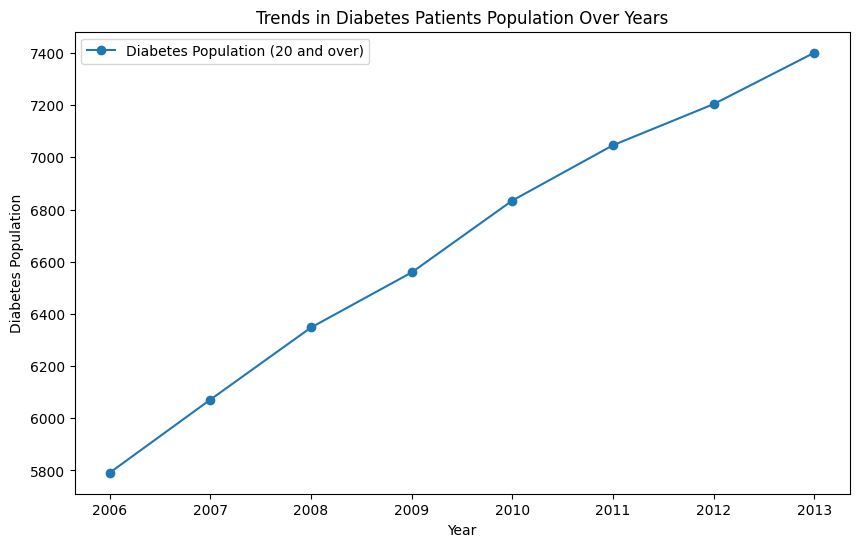

In [ ]:
#line graph
import matplotlib.pyplot as plt
years = agg.index
diabetes_population = agg['diabetes_population_20_over']
plt.figure(figsize=(10, 6))
plt.plot(years, diabetes_population, label='Diabetes Population (20 and over)', marker='o')
plt.xlabel('Year')
plt.ylabel('Diabetes Population')
plt.title('Trends in Diabetes Patients Population Over Years')
plt.legend()
plt.show()

This code generates a line graph depicting the trends in diabetes population among individuals aged 20 and over over the years 2006 to 2013. The x-axis represents the years, and the y-axis shows the corresponding diabetes population values. The line connects the data points, allowing us to observe the overall trend in diabetes prevalence over the specified time period. The markers ('o') highlight individual data points, and the title, "Trends in Diabetes Patients Population Over Years," provides context for the graph.

# **Filtering**


Given the significant impact of diabetes and obesity on public health, my focus was directed towards a detailed examination of their effects within the state of California. To facilitate this analysis, I implemented a focused approach by filtering the diabetes and obesity dataset based on the "state" column, specifically isolating information pertaining to California. This deliberate filtering enables a more refined exploration of the prevalence of diabetes and obesity within the state, allowing for a closer look at demographic trends, prevalence rates, and other relevant factors specific to California. This targeted analysis is instrumental in gaining insights into how diabetes and obesity have uniquely affected California

In [ ]:
#Filtering
state= diabetes_Population["state"] == "California"
year = diabetes_Population["year"] == 2010
diabetes_Population = diabetes_Population[state & year]
diabetes_Population

,year,county_name,state,abbreviations,metro_nonmetro,diabetes_population_20_over,total_population_20_over
1482,2010,Alameda County,California,CA,Metropolitan,88269.0,1131654.0
1497,2010,Alpine County,California,CA,Nonmetropolitan,85.0,885.0
1502,2010,Amador County,California,CA,Nonmetropolitan,3014.0,30755.0
1510,2010,Butte County,California,CA,Metropolitan,13331.0,164580.0
1521,2010,Calaveras County,California,CA,Nonmetropolitan,3246.0,35670.0
1523,2010,Colusa County,California,CA,Nonmetropolitan,1126.0,14436.0
1536,2010,Contra Costa County,California,CA,Metropolitan,58355.0,767829.0
1540,2010,Del Norte County,California,CA,Nonmetropolitan,1920.0,21818.0
1546,2010,El Dorado County,California,CA,Metropolitan,11006.0,135877.0
1559,2010,Fresno County,California,CA,Metropolitan,55932.0,621467.0


# **Life Expectancy**

This dataset contains information about life expectancy and population for different states in the United States. Each row represents a state and includes details such as the states's unique identifiers (fips, state_fips, county_fips), name, state, state abbreviation, and whether the counties are metropolitan or nonmetropolitan in the states.The crucial data points are the life expectancy, which gives an estimate of how long people in that state can expect to live, and the population, indicating the number of people living in that state.

In [ ]:
lifeexpectancy = pd.read_csv('https://query.data.world/s/tfbfxxes5xnlnyjnwktzmqtvgsx2gf?dws=00000')
lifeexpectancy

,year,fips,state_fips,county_fips,county_name,state_name,state_abbr,metro_nonmetro,life_expectancy,population
0,2010,1001,1,1,Autauga County,Alabama,AL,Metropolitan,75.74,54742
1,2010,1003,1,3,Baldwin County,Alabama,AL,Metropolitan,77.80,183199
2,2010,1005,1,5,Barbour County,Alabama,AL,Nonmetropolitan,75.34,27348
3,2010,1007,1,7,Bibb County,Alabama,AL,Metropolitan,74.13,22861
4,2010,1009,1,9,Blount County,Alabama,AL,Metropolitan,76.41,57376
...,...,...,...,...,...,...,...,...,...,...
6279,2014,56037,56,37,Sweetwater County,Wyoming,WY,Nonmetropolitan,77.87,44970
6280,2014,56039,56,39,Teton County,Wyoming,WY,Nonmetropolitan,83.46,22846
6281,2014,56041,56,41,Uinta County,Wyoming,WY,Nonmetropolitan,77.38,20871
6282,2014,56043,56,43,Washakie County,Wyoming,WY,Nonmetropolitan,78.86,8306


In [ ]:
#Dropping unnecessary columns
def drop_columns(data, columns_to_drop):
    for column in columns_to_drop:
        data = data.drop(columns=column, errors='ignore')
    return data
# Columns to drop
columns_to_drop = ["fips", "state_fips", "county_fips"]
lifeexpectancy = drop_columns(lifeexpectancy, columns_to_drop)
lifeexpectancy

,year,county_name,state_name,state_abbr,metro_nonmetro,life_expectancy,population
0,2010,Autauga County,Alabama,AL,Metropolitan,75.74,54742
1,2010,Baldwin County,Alabama,AL,Metropolitan,77.80,183199
2,2010,Barbour County,Alabama,AL,Nonmetropolitan,75.34,27348
3,2010,Bibb County,Alabama,AL,Metropolitan,74.13,22861
4,2010,Blount County,Alabama,AL,Metropolitan,76.41,57376
...,...,...,...,...,...,...,...
6279,2014,Sweetwater County,Wyoming,WY,Nonmetropolitan,77.87,44970
6280,2014,Teton County,Wyoming,WY,Nonmetropolitan,83.46,22846
6281,2014,Uinta County,Wyoming,WY,Nonmetropolitan,77.38,20871
6282,2014,Washakie County,Wyoming,WY,Nonmetropolitan,78.86,8306


In [ ]:
#Renaming column name
lifeexpectancy.rename(columns={'state_name':'state','state_abbr':'abbreviations'},inplace=True)

In [ ]:
#Filtering
state= lifeexpectancy["state"] == "California"
year= lifeexpectancy["year"] == 2010
lifeexpectancy = lifeexpectancy[state&year]
lifeexpectancy

,year,county_name,state,abbreviations,metro_nonmetro,life_expectancy,population
186,2010,Alameda County,California,CA,Metropolitan,80.92,1513653
187,2010,Alpine County,California,CA,Nonmetropolitan,78.83,1160
188,2010,Amador County,California,CA,Nonmetropolitan,79.56,37869
189,2010,Butte County,California,CA,Metropolitan,77.95,219983
190,2010,Calaveras County,California,CA,Nonmetropolitan,79.71,45462
191,2010,Colusa County,California,CA,Nonmetropolitan,79.65,21446
192,2010,Contra Costa County,California,CA,Metropolitan,80.95,1052875
193,2010,Del Norte County,California,CA,Nonmetropolitan,76.21,28562
194,2010,El Dorado County,California,CA,Metropolitan,80.83,181153
195,2010,Fresno County,California,CA,Metropolitan,78.63,932463


In [ ]:
#Merging
diabetes_and_lifeexpectancy_data = diabetes_Population.merge(lifeexpectancy,how="left",left_on="county_name",right_on="county_name")
diabetes_and_lifeexpectancy_data

,year_x,county_name,state_x,abbreviations_x,metro_nonmetro_x,diabetes_population_20_over,total_population_20_over,year_y,state_y,abbreviations_y,metro_nonmetro_y,life_expectancy,population
0,2010,Alameda County,California,CA,Metropolitan,88269.0,1131654.0,2010,California,CA,Metropolitan,80.92,1513653
1,2010,Alpine County,California,CA,Nonmetropolitan,85.0,885.0,2010,California,CA,Nonmetropolitan,78.83,1160
2,2010,Amador County,California,CA,Nonmetropolitan,3014.0,30755.0,2010,California,CA,Nonmetropolitan,79.56,37869
3,2010,Butte County,California,CA,Metropolitan,13331.0,164580.0,2010,California,CA,Metropolitan,77.95,219983
4,2010,Calaveras County,California,CA,Nonmetropolitan,3246.0,35670.0,2010,California,CA,Nonmetropolitan,79.71,45462
5,2010,Colusa County,California,CA,Nonmetropolitan,1126.0,14436.0,2010,California,CA,Nonmetropolitan,79.65,21446
6,2010,Contra Costa County,California,CA,Metropolitan,58355.0,767829.0,2010,California,CA,Metropolitan,80.95,1052875
7,2010,Del Norte County,California,CA,Nonmetropolitan,1920.0,21818.0,2010,California,CA,Nonmetropolitan,76.21,28562
8,2010,El Dorado County,California,CA,Metropolitan,11006.0,135877.0,2010,California,CA,Metropolitan,80.83,181153
9,2010,Fresno County,California,CA,Metropolitan,55932.0,621467.0,2010,California,CA,Metropolitan,78.63,932463


# **Dibetes and Obesity Trends**

This dataset provides information about diabetes and obesity for different States in the United States during the year 2010. Each row in the dataset represents a specific states and includes several attributes such as the year, the county's name, state name, the bivariate tertile classification, the percentage of people diagnosed with diabetes, and the percentage of individuals classified as obese. This comprehensive dataset allows for an in-depth analysis of health-related factors across U.S., particularly focusing on the prevalence of diabetes and obesity during the specified years. Researchers and analysts can utilize this data to identify patterns, trends, and variations in health indicators across different geographical regions within the United States.

In [ ]:
diabetes_and_obesity_data=pd.read_excel('/content/DiabetesAtlasData.xlsx',header=2).fillna(0)
diabetes_and_obesity_data

,Year,County_FIPS,County,State,Bivariate Tertile,Diagnosed Diabetes (Percentage),Obesity (Percentage)
0,2010,56045.0,Weston County,Wyoming,LH,7.6,32.0
1,2010,2158.0,Kusilvak Census Area,Alaska,LL,7.4,22.0
2,2010,46102.0,Oglala Lakota County,South Dakota,HH,17.9,37.6
3,2010,54021.0,Gilmer County,West Virginia,MM,8.4,27.8
4,2010,54023.0,Grant County,West Virginia,HM,11.7,30.3
...,...,...,...,...,...,...,...
3136,2010,6057.0,Nevada County,California,LL,5.1,15.7
3137,2010,6059.0,Orange County,California,ML,8.0,19.9
3138,2010,6061.0,Placer County,California,LL,6.0,18.9
3139,2010,6063.0,Plumas County,California,LL,6.9,18.1


In [ ]:
#Dropping Unnecessary columns
diabetes_and_obesity_data.drop(columns=['County_FIPS'],inplace=True)

In [ ]:
#Rename
diabetes_and_obesity_data.rename(columns={'State':'state','Year':'year','County':'county_name'},inplace=True)

In [ ]:
#Filtering
state= diabetes_and_obesity_data["state"] == "California"
year= diabetes_and_obesity_data["year"] == 2010
diabetes_and_obesity_data= diabetes_and_obesity_data[state&year]
diabetes_and_obesity_data

,year,county_name,state,Bivariate Tertile,Diagnosed Diabetes (Percentage),Obesity (Percentage)
2785,2010,Sacramento County,California,MM,8.8,28.9
2786,2010,San Benito County,California,ML,7.8,21.3
2787,2010,San Bernardino County,California,HH,11.1,32.7
2788,2010,San Diego County,California,ML,7.8,22.0
2789,2010,San Francisco County,California,LL,6.6,15.4
2790,2010,San Joaquin County,California,HH,9.9,36.0
2791,2010,San Luis Obispo County,California,MM,7.8,27.9
2792,2010,San Mateo County,California,LL,7.4,21.4
2793,2010,Santa Barbara County,California,LM,6.8,25.0
2794,2010,Santa Clara County,California,ML,8.3,19.6


In [ ]:
#Merging
diabesity_lifeexpectancy_data = diabetes_and_lifeexpectancy_data.merge(diabetes_and_obesity_data,how="inner",left_on="county_name",right_on="county_name")
diabesity_lifeexpectancy_data

,year_x,county_name,state_x,abbreviations_x,metro_nonmetro_x,diabetes_population_20_over,total_population_20_over,year_y,state_y,abbreviations_y,metro_nonmetro_y,life_expectancy,population,year,state,Bivariate Tertile,Diagnosed Diabetes (Percentage),Obesity (Percentage)
0,2010,Alameda County,California,CA,Metropolitan,88269.0,1131654.0,2010,California,CA,Metropolitan,80.92,1513653,2010,California,LL,6.6,22.6
1,2010,Alpine County,California,CA,Nonmetropolitan,85.0,885.0,2010,California,CA,Nonmetropolitan,78.83,1160,2010,California,LL,7.3,18.1
2,2010,Amador County,California,CA,Nonmetropolitan,3014.0,30755.0,2010,California,CA,Nonmetropolitan,79.56,37869,2010,California,ML,8.3,23.9
3,2010,Butte County,California,CA,Metropolitan,13331.0,164580.0,2010,California,CA,Metropolitan,77.95,219983,2010,California,MH,8.9,30.7
4,2010,Calaveras County,California,CA,Nonmetropolitan,3246.0,35670.0,2010,California,CA,Nonmetropolitan,79.71,45462,2010,California,LL,7.2,20.8
5,2010,Colusa County,California,CA,Nonmetropolitan,1126.0,14436.0,2010,California,CA,Nonmetropolitan,79.65,21446,2010,California,LL,7.1,23.2
6,2010,Contra Costa County,California,CA,Metropolitan,58355.0,767829.0,2010,California,CA,Metropolitan,80.95,1052875,2010,California,LL,7.6,23.9
7,2010,Del Norte County,California,CA,Nonmetropolitan,1920.0,21818.0,2010,California,CA,Nonmetropolitan,76.21,28562,2010,California,ML,8.1,21.2
8,2010,El Dorado County,California,CA,Metropolitan,11006.0,135877.0,2010,California,CA,Metropolitan,80.83,181153,2010,California,LL,6.4,23.5
9,2010,Fresno County,California,CA,Metropolitan,55932.0,621467.0,2010,California,CA,Metropolitan,78.63,932463,2010,California,HH,9.6,34.2


In [ ]:
#Dropping Unnecessary columns
diabesity_lifeexpectancy_data.drop(columns=['year_y','state_y','abbreviations_y','metro_nonmetro_y','year','state'],inplace=True)

In [ ]:
##Renaming
diabesity_lifeexpectancy_data.rename(columns={'year_x':'year','state_x':'state','abbreviations_x':'abbreviations','metro_nonmetro_x':'metro_nonmetro','Diagnosed Diabetes (Percentage)':'Diagnosed Diabetes Percentage','Obesity (Percentage)': 'Obesity Percentage'},inplace=True)

# **Regression Plot - Diagnosed Diabetes vs Obesity**

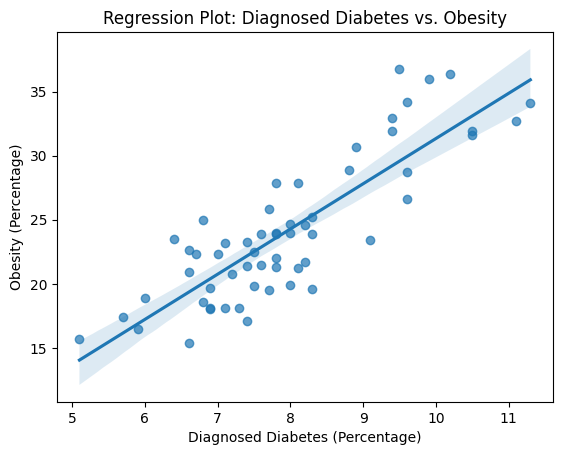

In [ ]:
# Regression Plot
sns.regplot(
    x='Diagnosed Diabetes (Percentage) ',
    y='Obesity (Percentage) ',
    data=diabesity_lifeexpectancy_data,
    scatter_kws={'alpha': 0.7}
)
plt.xlabel('Diagnosed Diabetes (Percentage)')
plt.ylabel('Obesity (Percentage)')
plt.title('Regression Plot: Diagnosed Diabetes vs. Obesity')
plt.show()

The regression plot shows 'diabesity_lifeexpectancy_data' to explore the potential relationship between diagnosed diabetes and obesity percentages. The x-axis represents diagnosed diabetes, the y-axis represents obesity, and each point signifies a specific location.

In [ ]:
#aggregation
diabesity_lifeexpectancy_data.groupby('metro_nonmetro').agg({'Diagnosed Diabetes (Percentage) ': 'sum', 'Obesity (Percentage) ': 'sum'})
diabesity_lifeexpectancy_data
diabesity_lifeexpectancy_data.head()

,year,county_name,state,abbreviations,metro_nonmetro,diabetes_population_20_over,total_population_20_over,life_expectancy,population,Bivariate Tertile,Diagnosed Diabetes (Percentage),Obesity (Percentage)
0,2010,Alameda County,California,CA,Metropolitan,88269.0,1131654.0,80.92,1513653,LL,6.6,22.6
1,2010,Alpine County,California,CA,Nonmetropolitan,85.0,885.0,78.83,1160,LL,7.3,18.1
2,2010,Amador County,California,CA,Nonmetropolitan,3014.0,30755.0,79.56,37869,ML,8.3,23.9
3,2010,Butte County,California,CA,Metropolitan,13331.0,164580.0,77.95,219983,MH,8.9,30.7
4,2010,Calaveras County,California,CA,Nonmetropolitan,3246.0,35670.0,79.71,45462,LL,7.2,20.8


In [ ]:
def column_name(dataframe):
  """
  This function returns the dataframe with cleaned column names by removing the extra spaces before, after and in between the words.
  (object)-->(object)
  """
  for col in diabesity_lifeexpectancy_data.columns:
    diabesity_lifeexpectancy_data.rename(columns={col: col.strip().replace('  ', '')}, inplace=True)
  return dataframe
diabesity_lifeexpectancy_data=column_name(diabesity_lifeexpectancy_data)


In [ ]:
diabesity_lifeexpectancy_data=diabesity_lifeexpectancy_data.rename(columns={"Diagnosed Diabetes (Percentage)":"Diagnosed_Diabetes_(Percentage)","Obesity (Percentage)":"Obesity_(Percentage)"})

# **Boxplot - Diagnosed Diabetes Percentage in MetropolitBoxplotan and Nonmetropolitan**

<Axes: xlabel='metro_nonmetro', ylabel='Diagnosed_Diabetes_(Percentage)'>

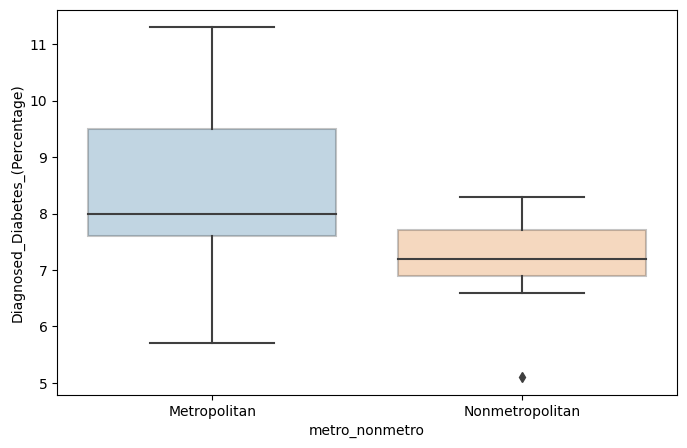

In [ ]:
#Boxplot#
from matplotlib import pyplot
fig, (ax1) = pyplot.subplots(1, figsize=(8,5))
sns.boxplot(ax = ax1, x = 'metro_nonmetro', y = 'Diagnosed_Diabetes_(Percentage)', data = diabesity_lifeexpectancy_data, boxprops=dict(alpha=.3))

The boxplot compares diagnosed diabetes percentages in metropolitan and nonmetropolitan areas using 'diabesity_lifeexpectancy_data.' The x-axis represents area types, and the y-axis shows diagnosed diabetes percentages. Each box illustrates the distribution in its respective category.

# **Correlation between various health and demographic variables**

In [ ]:
#Calculating correlation between variables
diabesity_lifeexpectancy_data.iloc[:,-10:].corr()

<ipython-input-195-0c5f749a8ffa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  diabesity_lifeexpectancy_data.iloc[:,-10:].corr()


,diabetes_population_20_over,total_population_20_over,life_expectancy,population,Diagnosed_Diabetes_(Percentage),Obesity_(Percentage)
diabetes_population_20_over,1.000000,0.997989,0.233657,0.998783,0.231991,0.064044
total_population_20_over,0.997989,1.000000,0.253613,0.999655,0.207224,0.037557
life_expectancy,0.233657,0.253613,1.000000,0.245081,-0.357312,-0.323240
population,0.998783,0.999655,0.245081,1.000000,0.222968,0.052835
Diagnosed_Diabetes_(Percentage),0.231991,0.207224,-0.357312,0.222968,1.000000,0.846958
Obesity_(Percentage),0.064044,0.037557,-0.323240,0.052835,0.846958,1.000000


<ipython-input-196-f58a92217cd1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diabesity_lifeexpectancy_data.iloc[:,-10:].corr('spearman'), center=0,cmap='RdYlBu')


<Figure size 600x600 with 0 Axes>

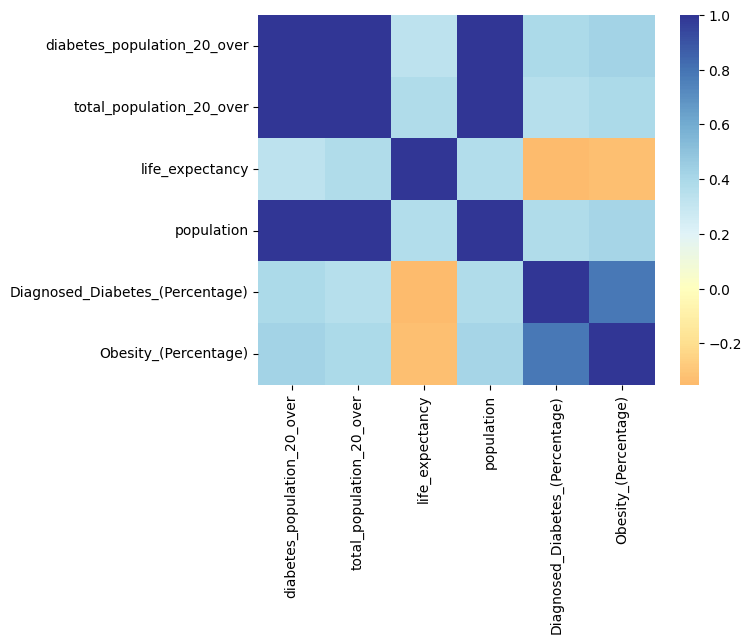

<Figure size 600x600 with 0 Axes>

In [ ]:
#Visualizing the correlation between variables
sns.heatmap(diabesity_lifeexpectancy_data.iloc[:,-10:].corr('spearman'), center=0,cmap='RdYlBu')
plt.figure(figsize=(6, 6))

This heatmap helps to visualize correlations between various health and demographic variables in the 'diabesity_lifeexpectancy_data' dataset. The focus is on the last ten columns, and Spearman correlation is used. Warmer colors indicate positive correlations, cooler colors indicate negative correlation.

# **Conclusion**


In summary, the analysis begins by identifying the top 10 states most affected by diabetes based on the diabetes population in the dataset. The focus then shifts to California in 2010, exploring the interplay between diabetes, obesity, and life expectancy. The analysis involves data cleaning, filtering, and merging from various sources to create a comprehensive dataset named 'diabesity_lifeexpectancy_data.'A regression plot showcases the positive correlation between diagnosed diabetes percentage and obesity percentage. Subsequently, the dataset is aggregated based on metropolitan/non-metropolitan status, and a boxplot is generated to illustrate the distribution of diagnosed diabetes percentages across these areas.

The project underscores the importance of recognizing patterns among health factors, emphasizing the need for targeted interventions and public health strategies. As California emerges as a state with distinctive health challenges.These findings offer insights crucial for shaping policies, resource allocations, and healthcare infrastructure responses. The analysis provides a nuanced understanding of the complex relationships between diabetes, obesity, and life expectancy, laying the groundwork for informed decision-making in public health initiatives.